<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl_2/blob/main/ML_T1_sencillo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

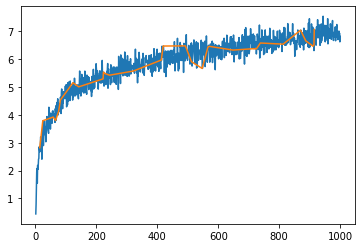

In [15]:
#Resolvamos el problema original.
import numpy as np
import matplotlib.pyplot as plt
def GD_N(theta,alpha,eta,nIter, grad,stop_crit=10**(-4)):
    p     = np.zeros(theta.shape)
    Theta=[theta]
    for t in range(nIter):
        pre_theta = theta - 2.0*alpha*p
        g = grad(pre_theta)
        p = 0.5*(g + eta*p)
        if(np.linalg.norm(g)<stop_crit):
            if(t==0):
                print("No hizo nada\n")
            break
        theta = theta - alpha*p
        Theta.append(theta)
    print("Iteraciones: ",t)
    return Theta[-1]
np.random.seed(0)
n=1000
x=np.linspace(1,n,n)
y=np.log(x)+np.random.normal(0,.25,size=len(x))
from numpy.random import default_rng
m=30
x_m=np.sort(default_rng().choice(np.arange(0, len(x)), size=m, replace=False))
y_m=y[x_m]
plt.plot(x,y)
plt.plot(x_m,y_m)

In [16]:
def matriz_phi_sigma(sigma):
    M=np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            M[i,j] = np.exp(-((x[i] -x_m[j])**2)/(2*(sigma[j])**2))#*((x_m[i] -x_m[j])**2)/(2*sigma[i]**3)
    return M

In [17]:
def solve_for_alphas(M):
    return np.dot(np.dot(np.linalg.inv(np.dot(M.T,M)),M.T),y)
solve_for_alphas(matriz_phi_sigma(np.repeat(1,m)))

#Asi ya puedo resolver para alpha, dado sigma.

array([3.88509989, 4.63692251, 5.73569738, 5.71652916, 5.95308769,
       6.27142534, 6.86133107, 6.95214719, 4.31278417, 4.04756882,
       7.59560018, 7.66979408, 7.98314964, 8.52662332, 8.93730206,
       8.75488681, 8.9622634 , 8.82668453, 8.77393442, 8.90384412,
       9.20314733, 9.31232885, 8.96538722, 9.13682655, 9.61809279,
       9.66163032, 9.59863929, 9.10499469, 3.00302799, 6.88798947])

In [18]:
def phi(s,x,x_j):
    return np.exp(-(1/2*s**2)*(x-x_j)**2)
def J_sigma_phi(sigma,alpha):
    J=np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            J[i][j]=alpha[j]*(phi(s=sigma[j],x=x[i],x_j=x_m[j]))*((x[i]-x_m[j])**2/sigma[j]**3)
    return J
#J_sigma_phi(sigma=np.repeat(1,100),alpha=np.repeat(1,100))


In [53]:
def F_ajuste(sigma,alpha,z):
    sum=0
    for j in range(m):
        sum+=alpha[j]*np.exp(-(1/(2*sigma[j]**2))*(z-x_m[j])**2)
    return sum

Iteraciones:  14
Iteraciones:  14


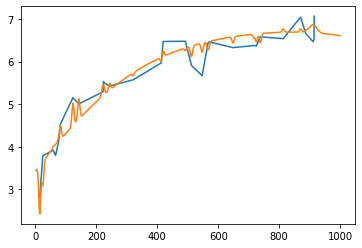

(array([ -1.134108  ,  -0.56516905,   0.03979735,   0.03300597,
         0.07519154,   0.32317042,   0.52379597,   0.48379901,
         0.27527002,   0.85380733,  -0.03718801,   0.1612929 ,
        -0.06929424,  -0.12115045,   0.14768695,  -0.0649033 ,
        -0.24953947,  -0.21412826,  -0.16510708,  -0.06002698,
        -0.14580271,  -0.07416375,  -0.18696695,  -0.21550117,
         0.07760125,   0.07795948,   0.03236459,   0.19194069,
        26.76647115, -20.15700757]), array([ 3.21951250e+00,  3.25308098e+00,  3.28118396e+00,  3.27629234e+00,
        3.25299845e+00,  3.28100375e+00,  3.37378460e+00,  3.38788718e+00,
        4.42124379e+00, -3.02394354e+02,  3.48588800e+00,  3.43064495e+00,
        3.45825197e+00,  3.34846975e+00,  3.36039045e+00,  3.54972251e+00,
        3.52126447e+00,  3.60417363e+00,  3.29701884e+00,  3.30253220e+00,
        3.56221847e+00,  3.42275727e+00,  3.41020072e+00,  3.51912006e+00,
        3.66138753e+00,  3.64838745e+00,  3.67671900e+00, -1.20249360e+

In [62]:
def rutina(n,sigma_0,alpha_0):
    for r in range(n): 
        alpha_0=solve_for_alphas(matriz_phi_sigma(sigma_0))
        def grad_alpha(sigma):
            return np.dot(-J_sigma_phi(sigma=sigma,alpha=alpha_0).T,(y-np.dot(matriz_phi_sigma(sigma=sigma),alpha_0)))
        sigma_0=GD_N(theta=sigma_0,alpha=1,eta=0.9,nIter=k, grad=grad_alpha,stop_crit=10**(-6))
    def F_ajuste_a_s(W):
       R=[]
       for w in W:
           R.append(F_ajuste(sigma=sigma_0,alpha=alpha_0,z=w))
       return np.array(R)
    plt.plot(x_m,y_m)
    plt.plot(x,F_ajuste_a_s(x))
    plt.show()
    return alpha_0,sigma_0
sigma_0=np.random.normal(3,0,size=m)
alpha_0=np.repeat(1,m)
k=15
print(rutina(2,sigma_0=sigma_0,alpha_0=alpha_0))

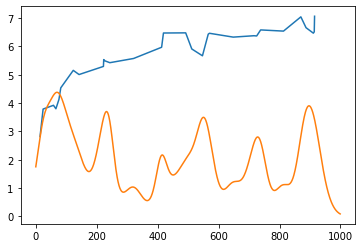